## <span style="color:blue">  Esercizio 4</span>

### Exercise 04.1

Il codice di *Molecolar Dynamics (MD)* incomincia a "runnare" con una configurazione spaziale data delle $N$ particelle, e una volta che la simulazione è finita ne scrive le configuarazione finali.
1. La prima parte dell'esercizio comprende l'implementazione del codice inserendo la possibilità di rincomiciare la simulazione non solo dalla configuarazione attuale ma anche da quella precedente.
2. Aggiungere anche la possibilità di riscalare le velocità per far si di correggere la temperatura.


### Exercise 04.2

Implementare nel codice *Molecolar Dynamics* la media a blocchi per l'energia internza per particella $E/N$, l'energia potenziale per particella , $U/N$, l'energia cinetica per particella $K/N$T, e la temperatura $T$.


### Exercise 04.3

<span style="color:red">Includere il calcolo della pressione, $P$, sia istantanea che mediata.

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Esercizioe 04.4

Simulare  Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) e Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) alle seguenti condizioni:
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off : $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off : $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off : $r_c = 5.0$)

E mostrare grafici dei valori ottenuti in unità SI.


### Cenni all'algoritmo *Molecolar Dynamics*

L'algoritmo MD funziona sostanzialmete come un microscopio. Le informazioni microscopiche vengono poi convertite in osservabili macroscopiche usando la meccanica statistica.



L'algoritmo calcola l'energia potenziale per le posizioni atomiche ($3N$) tramite il Verlet algorithm (algoritmo che calcola le nuove posizioni ($t + dt$) delle particelle servendosi delle posizioni al tempo $t$ e al tempo $t- dt$).

### Argon Liquido

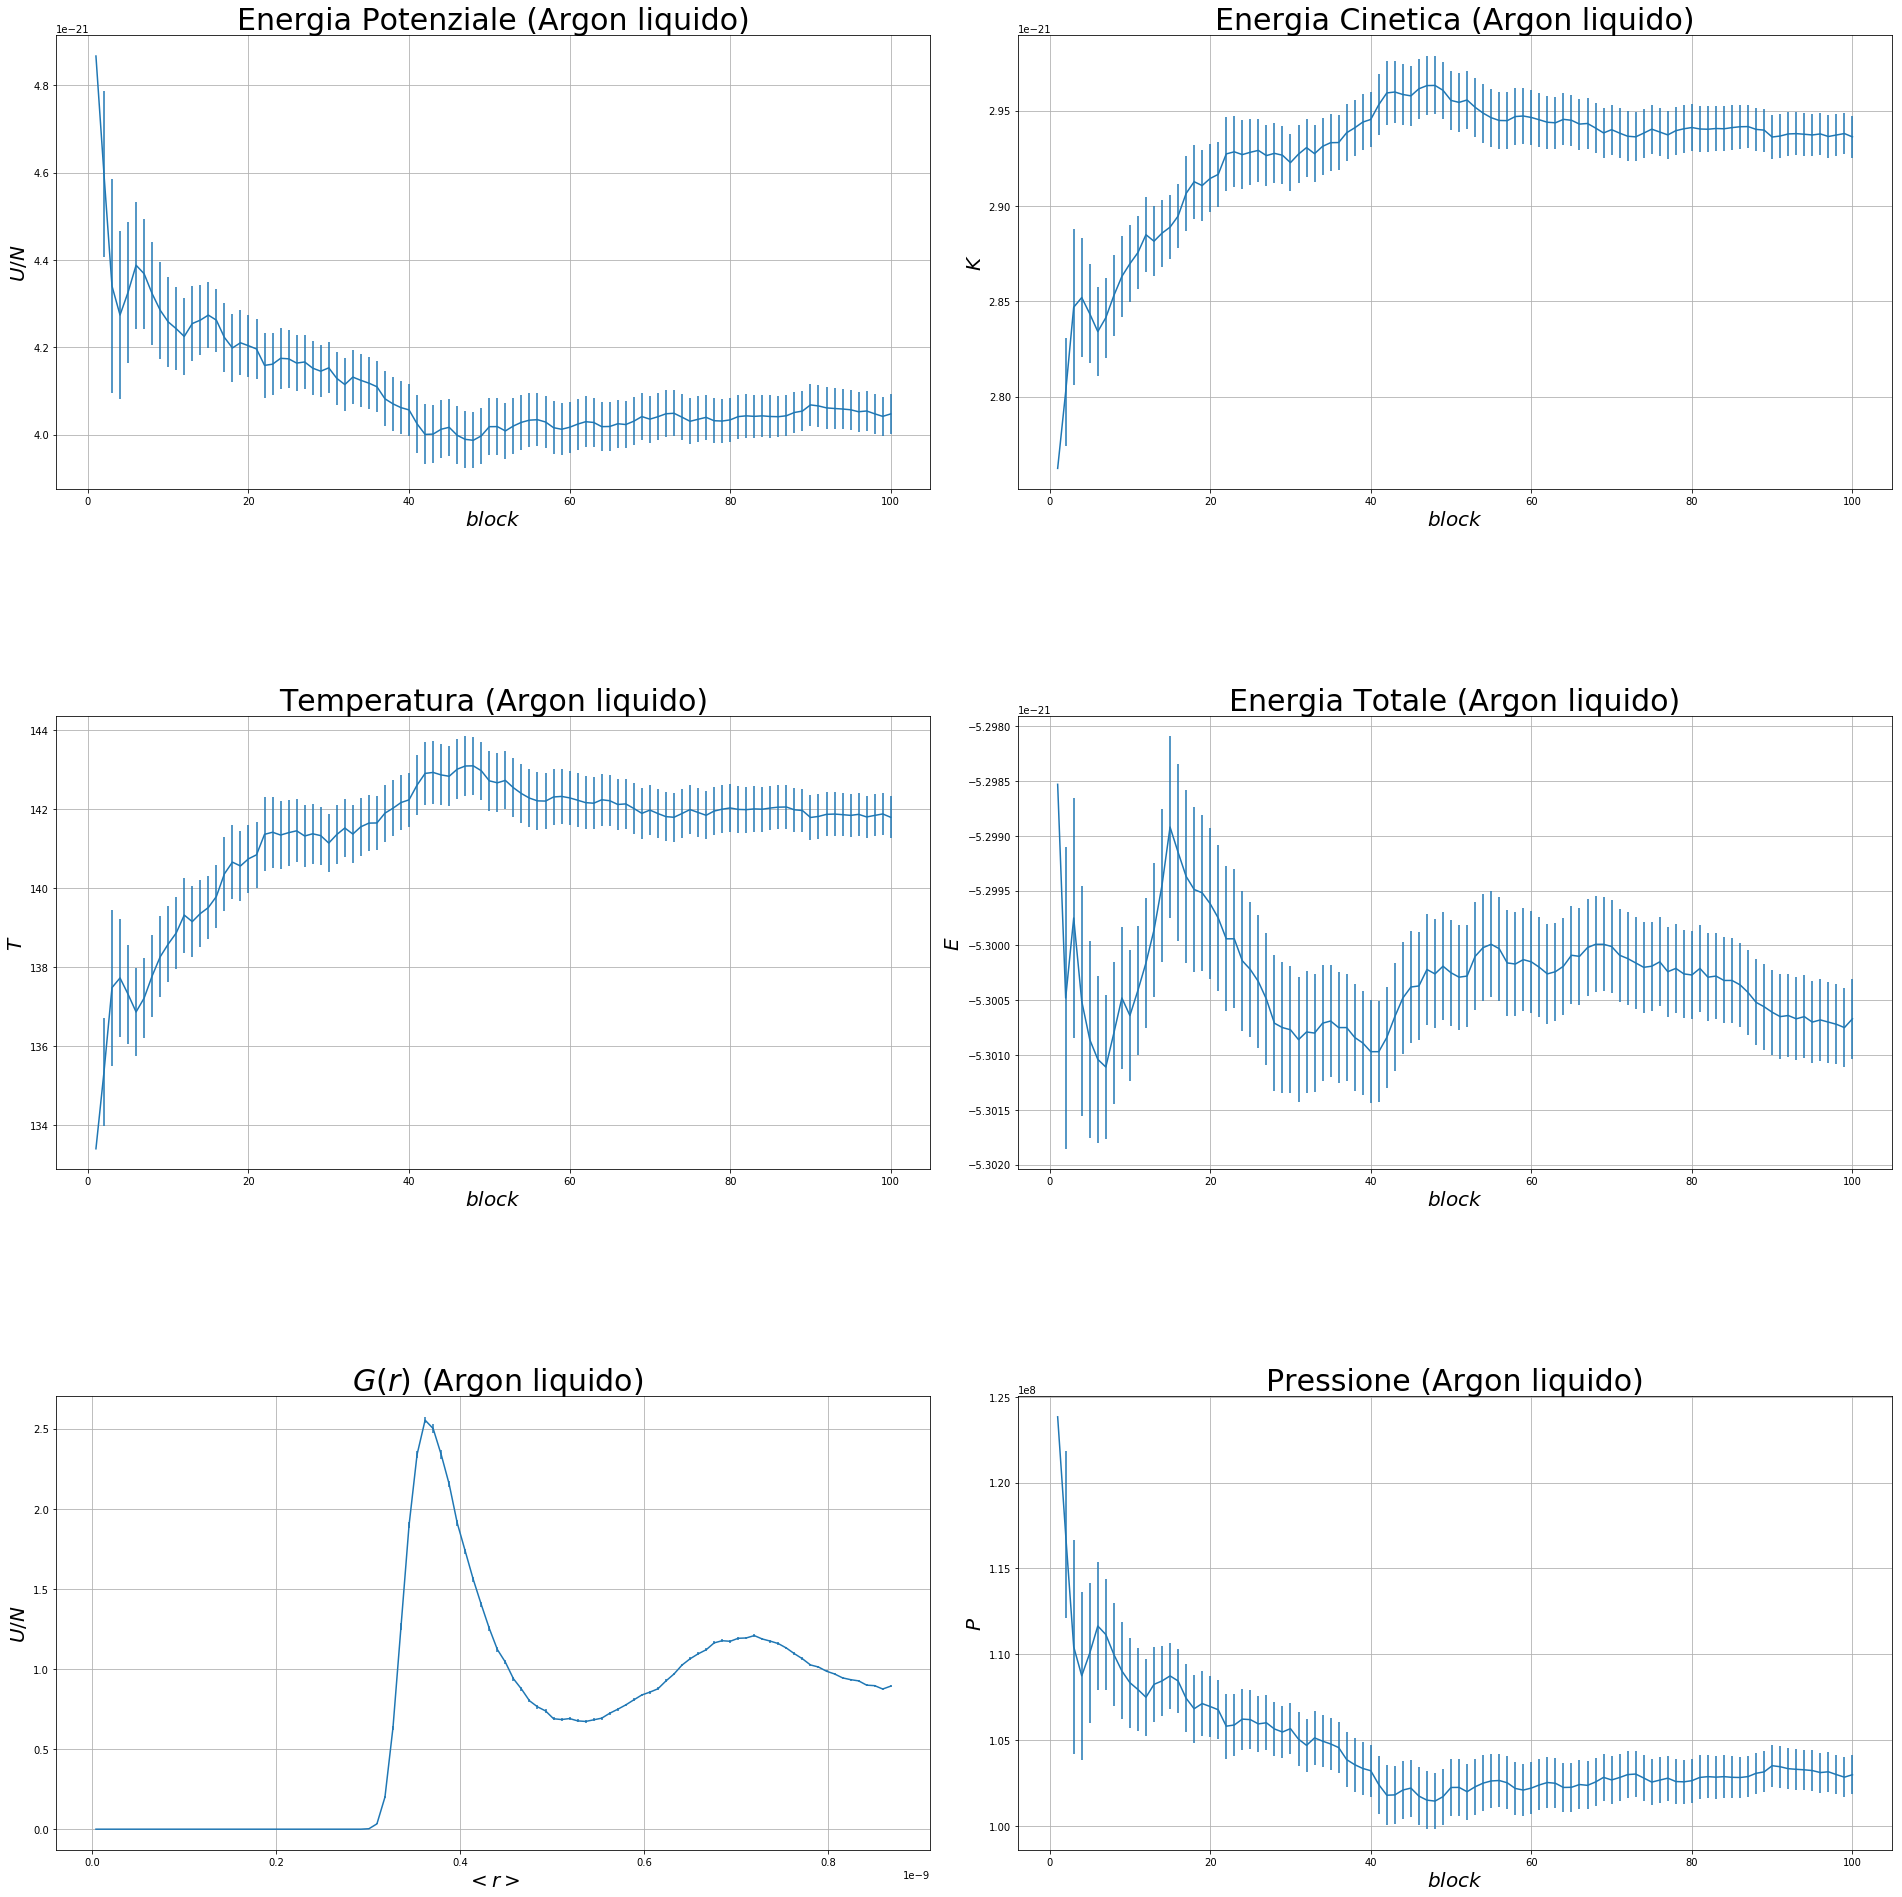

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x,a,y,erry = np.loadtxt("Argon/Argon_L.epot.dat",unpack=True)
x1,a1,y1,erry1 = np.loadtxt("Argon/Argon_L.kin.dat",unpack=True)
x2,a2,y2,erry2 = np.loadtxt("Argon/Argon_L.tem.dat",unpack=True)
x3,a3,y3,erry3 = np.loadtxt("Argon/Argon_L.etot.dat",unpack=True)
b4,a4,x4,y4,erry4 = np.loadtxt("Argon/Argon_L.gofr.dat",unpack=True)
x5,a5,y5,erry5 = np.loadtxt("Argon/Argon_L.press.dat",unpack=True)


plt.figure(figsize=(30,30))

plt.subplot(321) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title('Energia Potenziale (Argon liquido)',fontsize=30)


plt.subplot(322) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$K$',fontsize=20)
plt.grid(True)
plt.title('Energia Cinetica (Argon liquido)',fontsize=30)

plt.subplot(323) 
plt.errorbar(x2,y2,yerr=erry2)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$T$',fontsize=20)
plt.grid(True)
plt.title('Temperatura (Argon liquido)',fontsize=30)

plt.subplot(324) 
plt.errorbar(x3,y3,yerr=erry3)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$E$',fontsize=20)
plt.grid(True)
plt.title('Energia Totale (Argon liquido)',fontsize=30)

plt.subplot(325) 
plt.errorbar(x4,y4,yerr=erry4)
plt.xlabel('$<r>$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title(' $G(r)$ (Argon liquido)',fontsize=30)

plt.subplot(326) 
plt.errorbar(x5,y5,yerr=erry5)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$P$',fontsize=20)
plt.grid(True)
plt.title('Pressione (Argon liquido)',fontsize=30)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.1) 

plt.show()

### Krypton Liquido

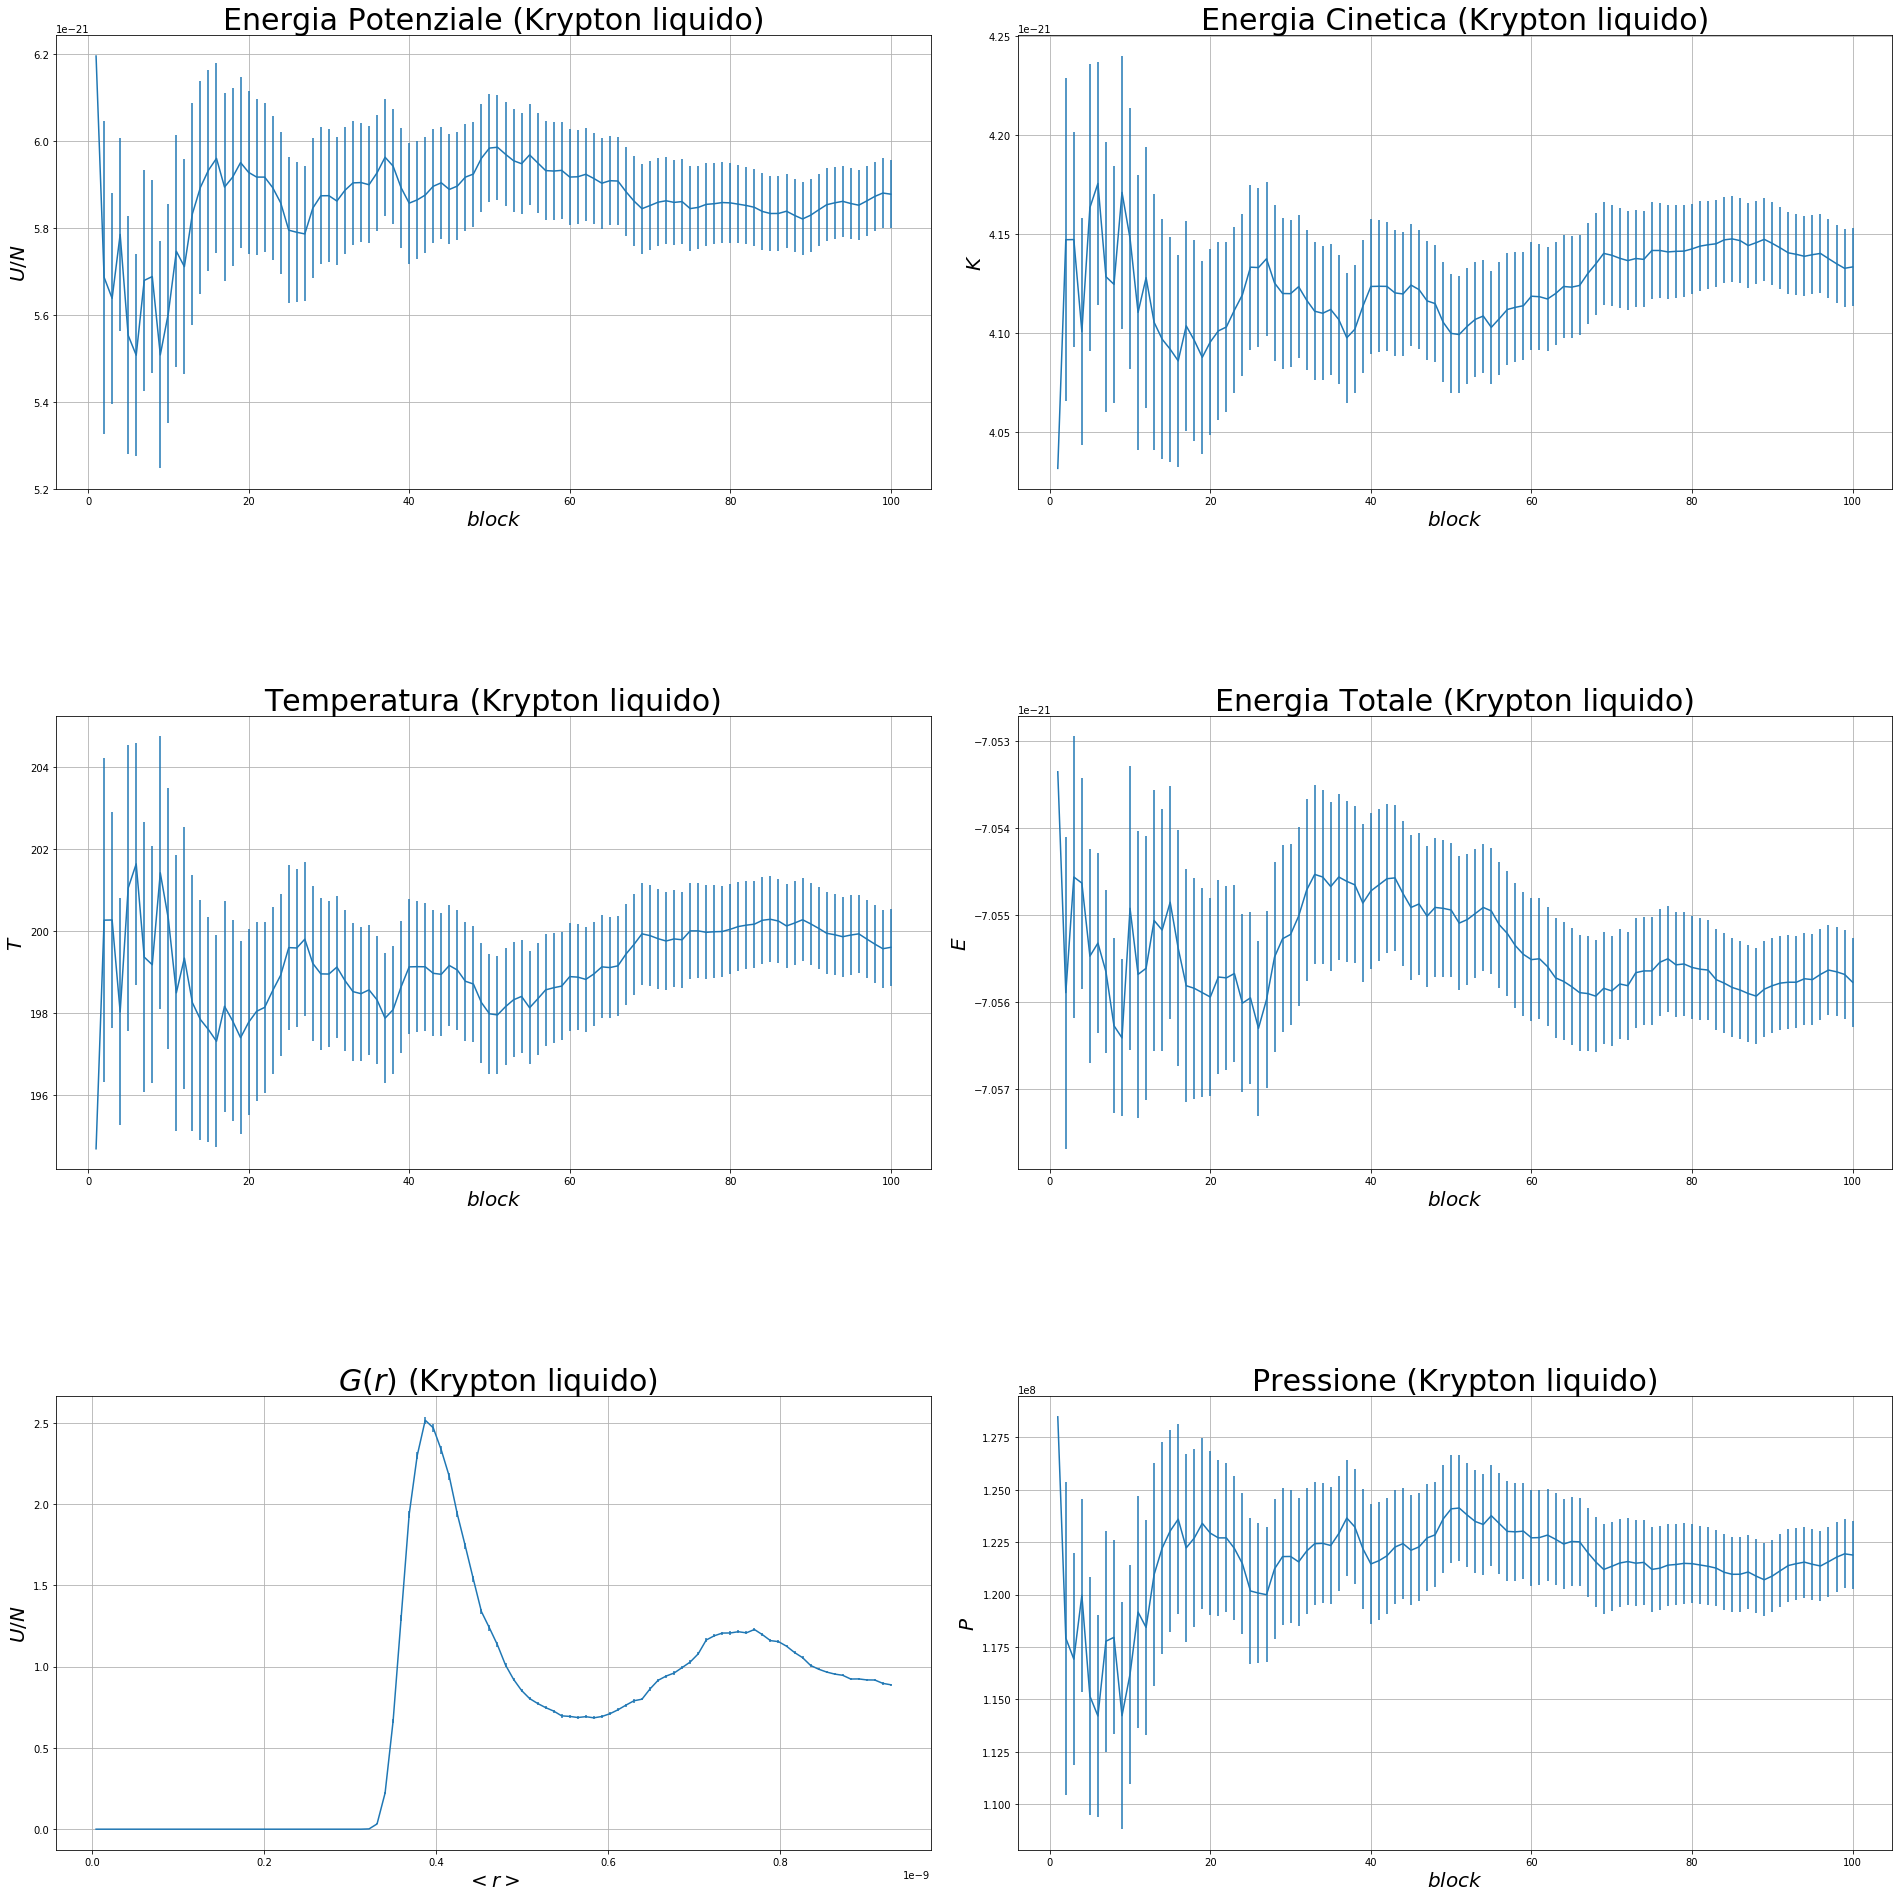

In [16]:
x,a,y,erry = np.loadtxt("Krypton/Krypton_L.epot.dat",unpack=True)
x1,a1,y1,erry1 = np.loadtxt("Krypton/Krypton_L.kin.dat",unpack=True)
x2,a2,y2,erry2 = np.loadtxt("Krypton/Krypton_L.tem.dat",unpack=True)
x3,a3,y3,erry3 = np.loadtxt("Krypton/Krypton_L.etot.dat",unpack=True)
b4,a4,x4,y4,erry4 = np.loadtxt("Krypton/Krypton_L.gofr.dat",unpack=True)
x5,a5,y5,erry5 = np.loadtxt("Krypton/Krypton_L.press.dat",unpack=True)


plt.figure(figsize=(30,30))

plt.subplot(321) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title('Energia Potenziale (Krypton liquido)',fontsize=30)


plt.subplot(322) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$K$',fontsize=20)
plt.grid(True)
plt.title('Energia Cinetica (Krypton liquido)',fontsize=30)

plt.subplot(323) 
plt.errorbar(x2,y2,yerr=erry2)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$T$',fontsize=20)
plt.grid(True)
plt.title('Temperatura (Krypton liquido)',fontsize=30)

plt.subplot(324) 
plt.errorbar(x3,y3,yerr=erry3)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$E$',fontsize=20)
plt.grid(True)
plt.title('Energia Totale (Krypton liquido)',fontsize=30)

plt.subplot(325) 
plt.errorbar(x4,y4,yerr=erry4)
plt.xlabel('$<r>$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title(' $G(r)$ (Krypton liquido)',fontsize=30)

plt.subplot(326) 
plt.errorbar(x5,y5,yerr=erry5)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$P$',fontsize=20)
plt.grid(True)
plt.title('Pressione (Krypton liquido)',fontsize=30)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.1) 

plt.show()

### Argon Solido

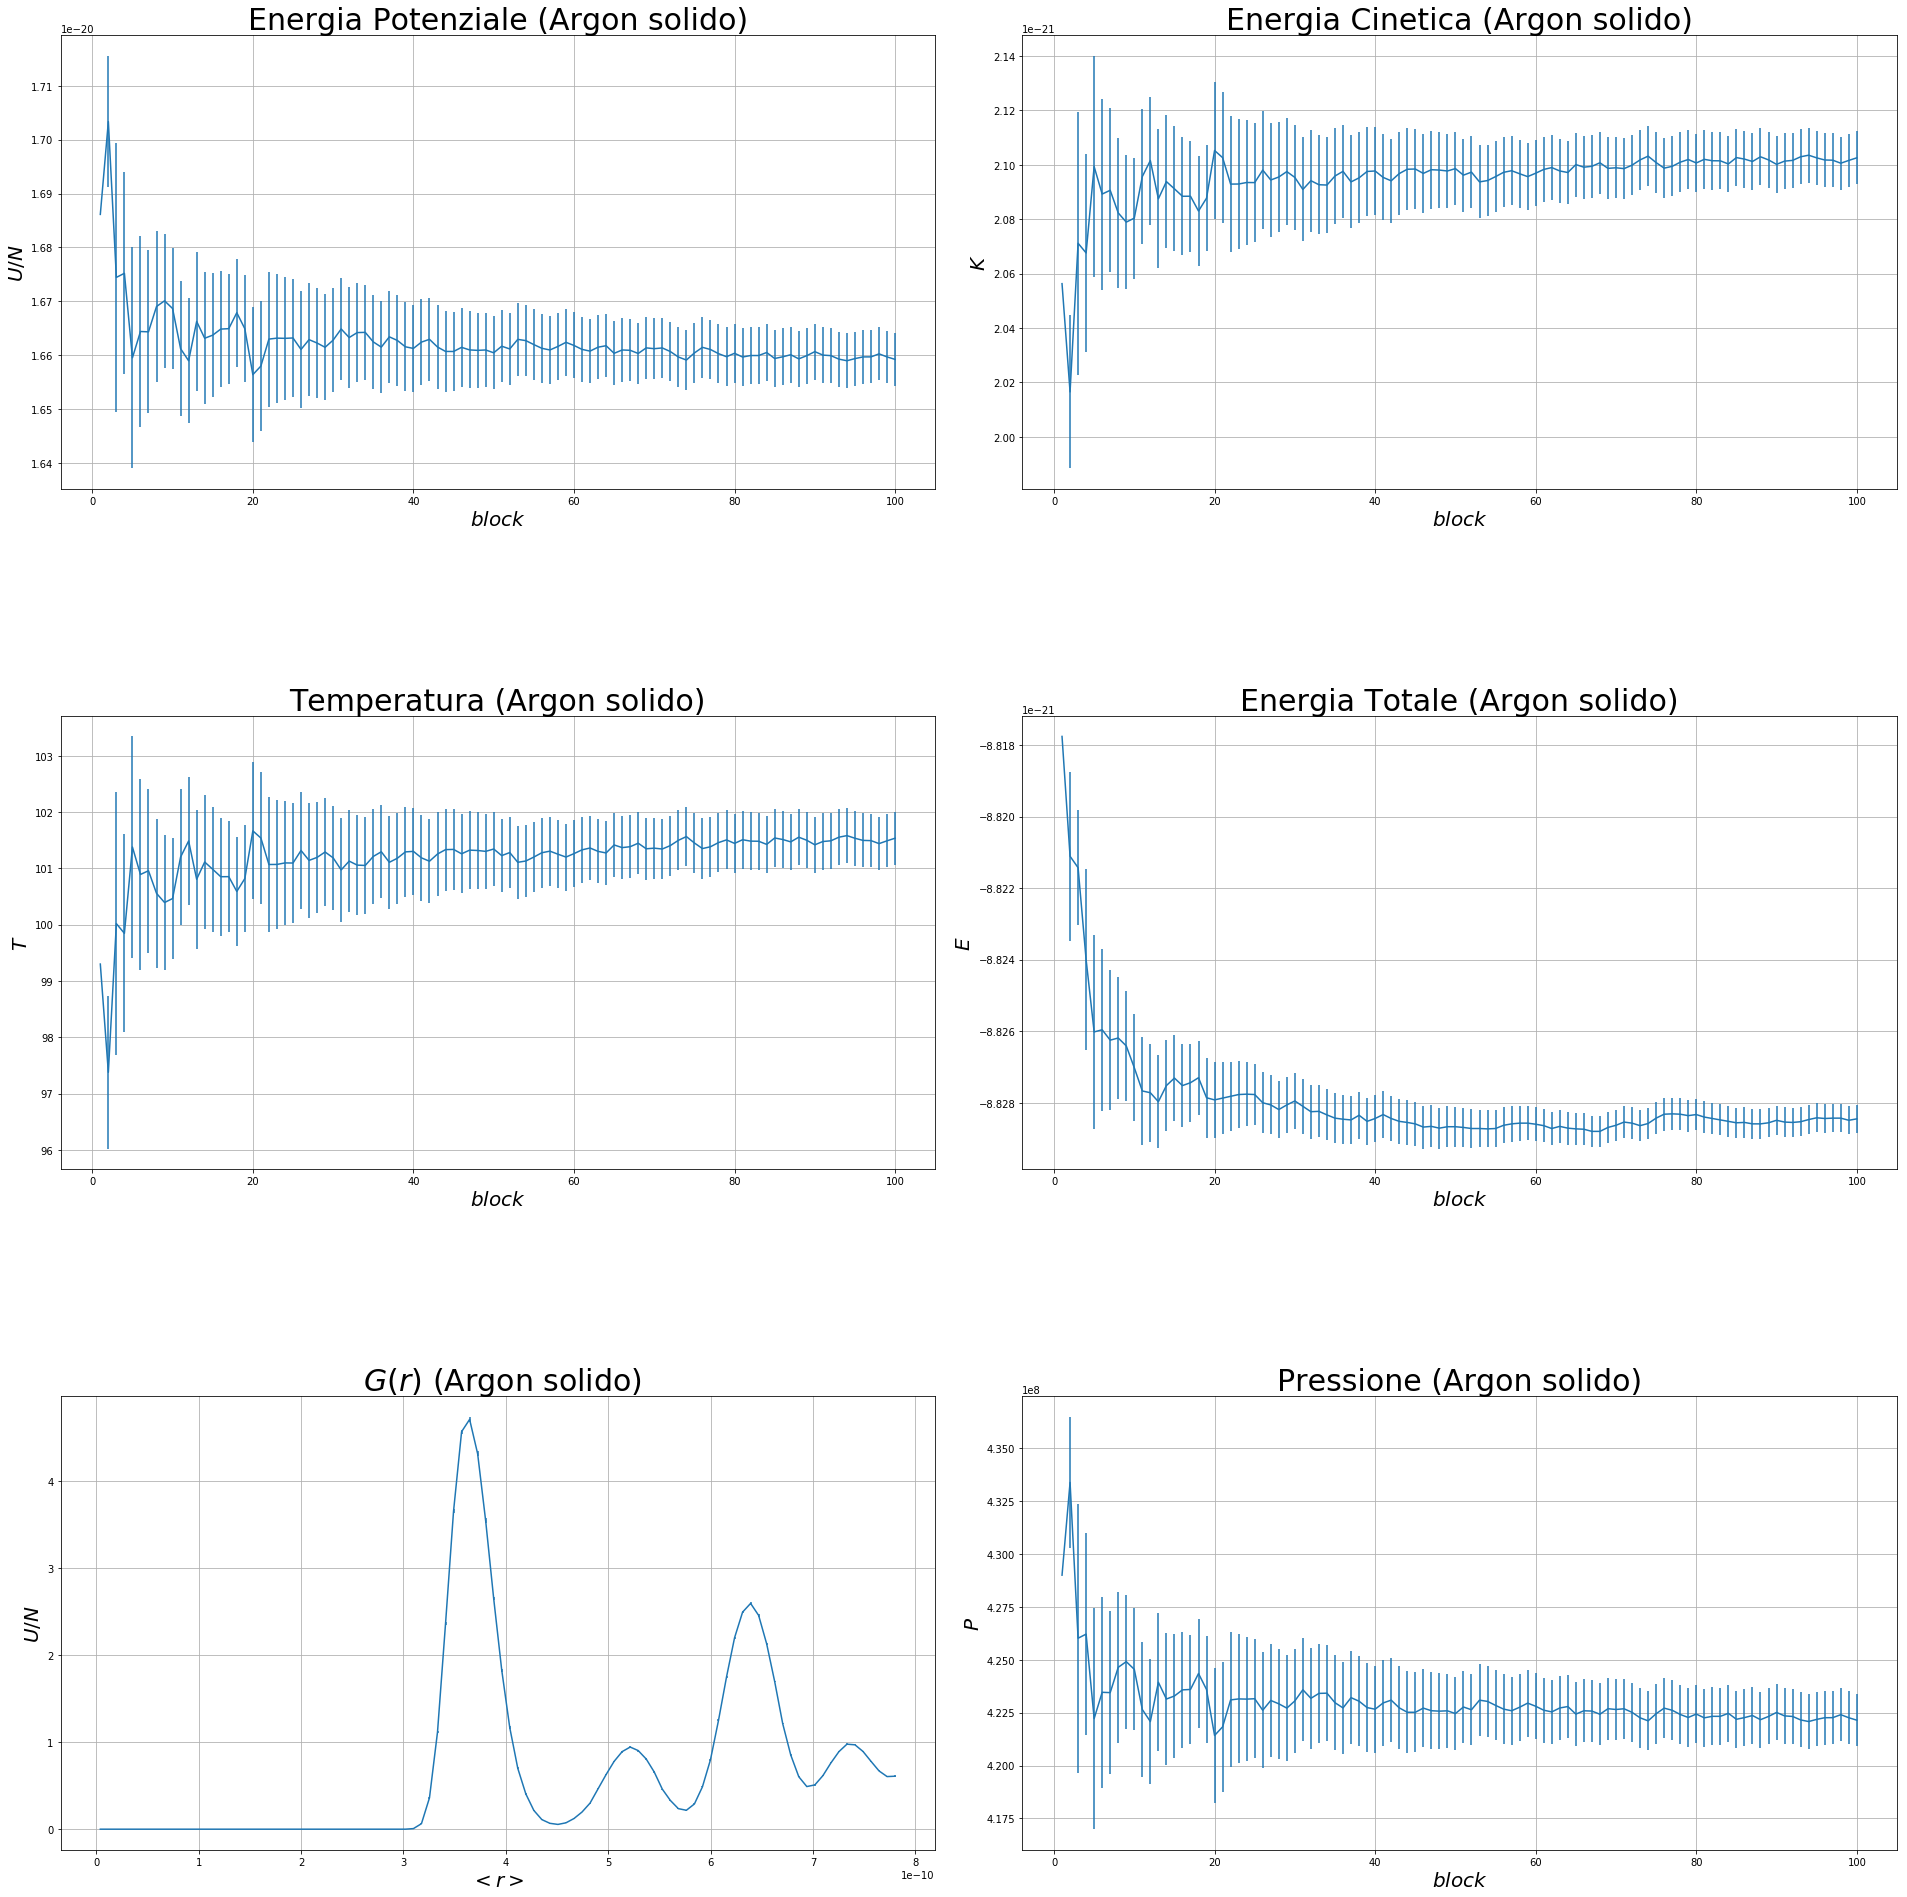

In [4]:
x,a,y,erry = np.loadtxt("Argon/Argon_S.epot.dat",unpack=True)
x1,a1,y1,erry1 = np.loadtxt("Argon/Argon_S.kin.dat",unpack=True)
x2,a2,y2,erry2 = np.loadtxt("Argon/Argon_S.tem.dat",unpack=True)
x3,a3,y3,erry3 = np.loadtxt("Argon/Argon_S.etot.dat",unpack=True)
b4,a4,x4,y4,erry4 = np.loadtxt("Argon/Argon_S.gofr.dat",unpack=True)
x5,a5,y5,erry5 = np.loadtxt("Argon/Argon_S.press.dat",unpack=True)


plt.figure(figsize=(30,30))

plt.subplot(321) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title('Energia Potenziale (Argon solido)',fontsize=30)


plt.subplot(322) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$K$',fontsize=20)
plt.grid(True)
plt.title('Energia Cinetica (Argon solido)',fontsize=30)

plt.subplot(323) 
plt.errorbar(x2,y2,yerr=erry2)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$T$',fontsize=20)
plt.grid(True)
plt.title('Temperatura (Argon solido)',fontsize=30)

plt.subplot(324) 
plt.errorbar(x3,y3,yerr=erry3)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$E$',fontsize=20)
plt.grid(True)
plt.title('Energia Totale (Argon solido)',fontsize=30)

plt.subplot(325) 
plt.errorbar(x4,y4,yerr=erry4)
plt.xlabel('$<r>$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title(' $G(r)$ (Argon solido)',fontsize=30)

plt.subplot(326) 
plt.errorbar(x5,y5,yerr=erry5)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$P$',fontsize=20)
plt.grid(True)
plt.title('Pressione (Argon solido)',fontsize=30)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.1) 

plt.show()

### Krypton Solido

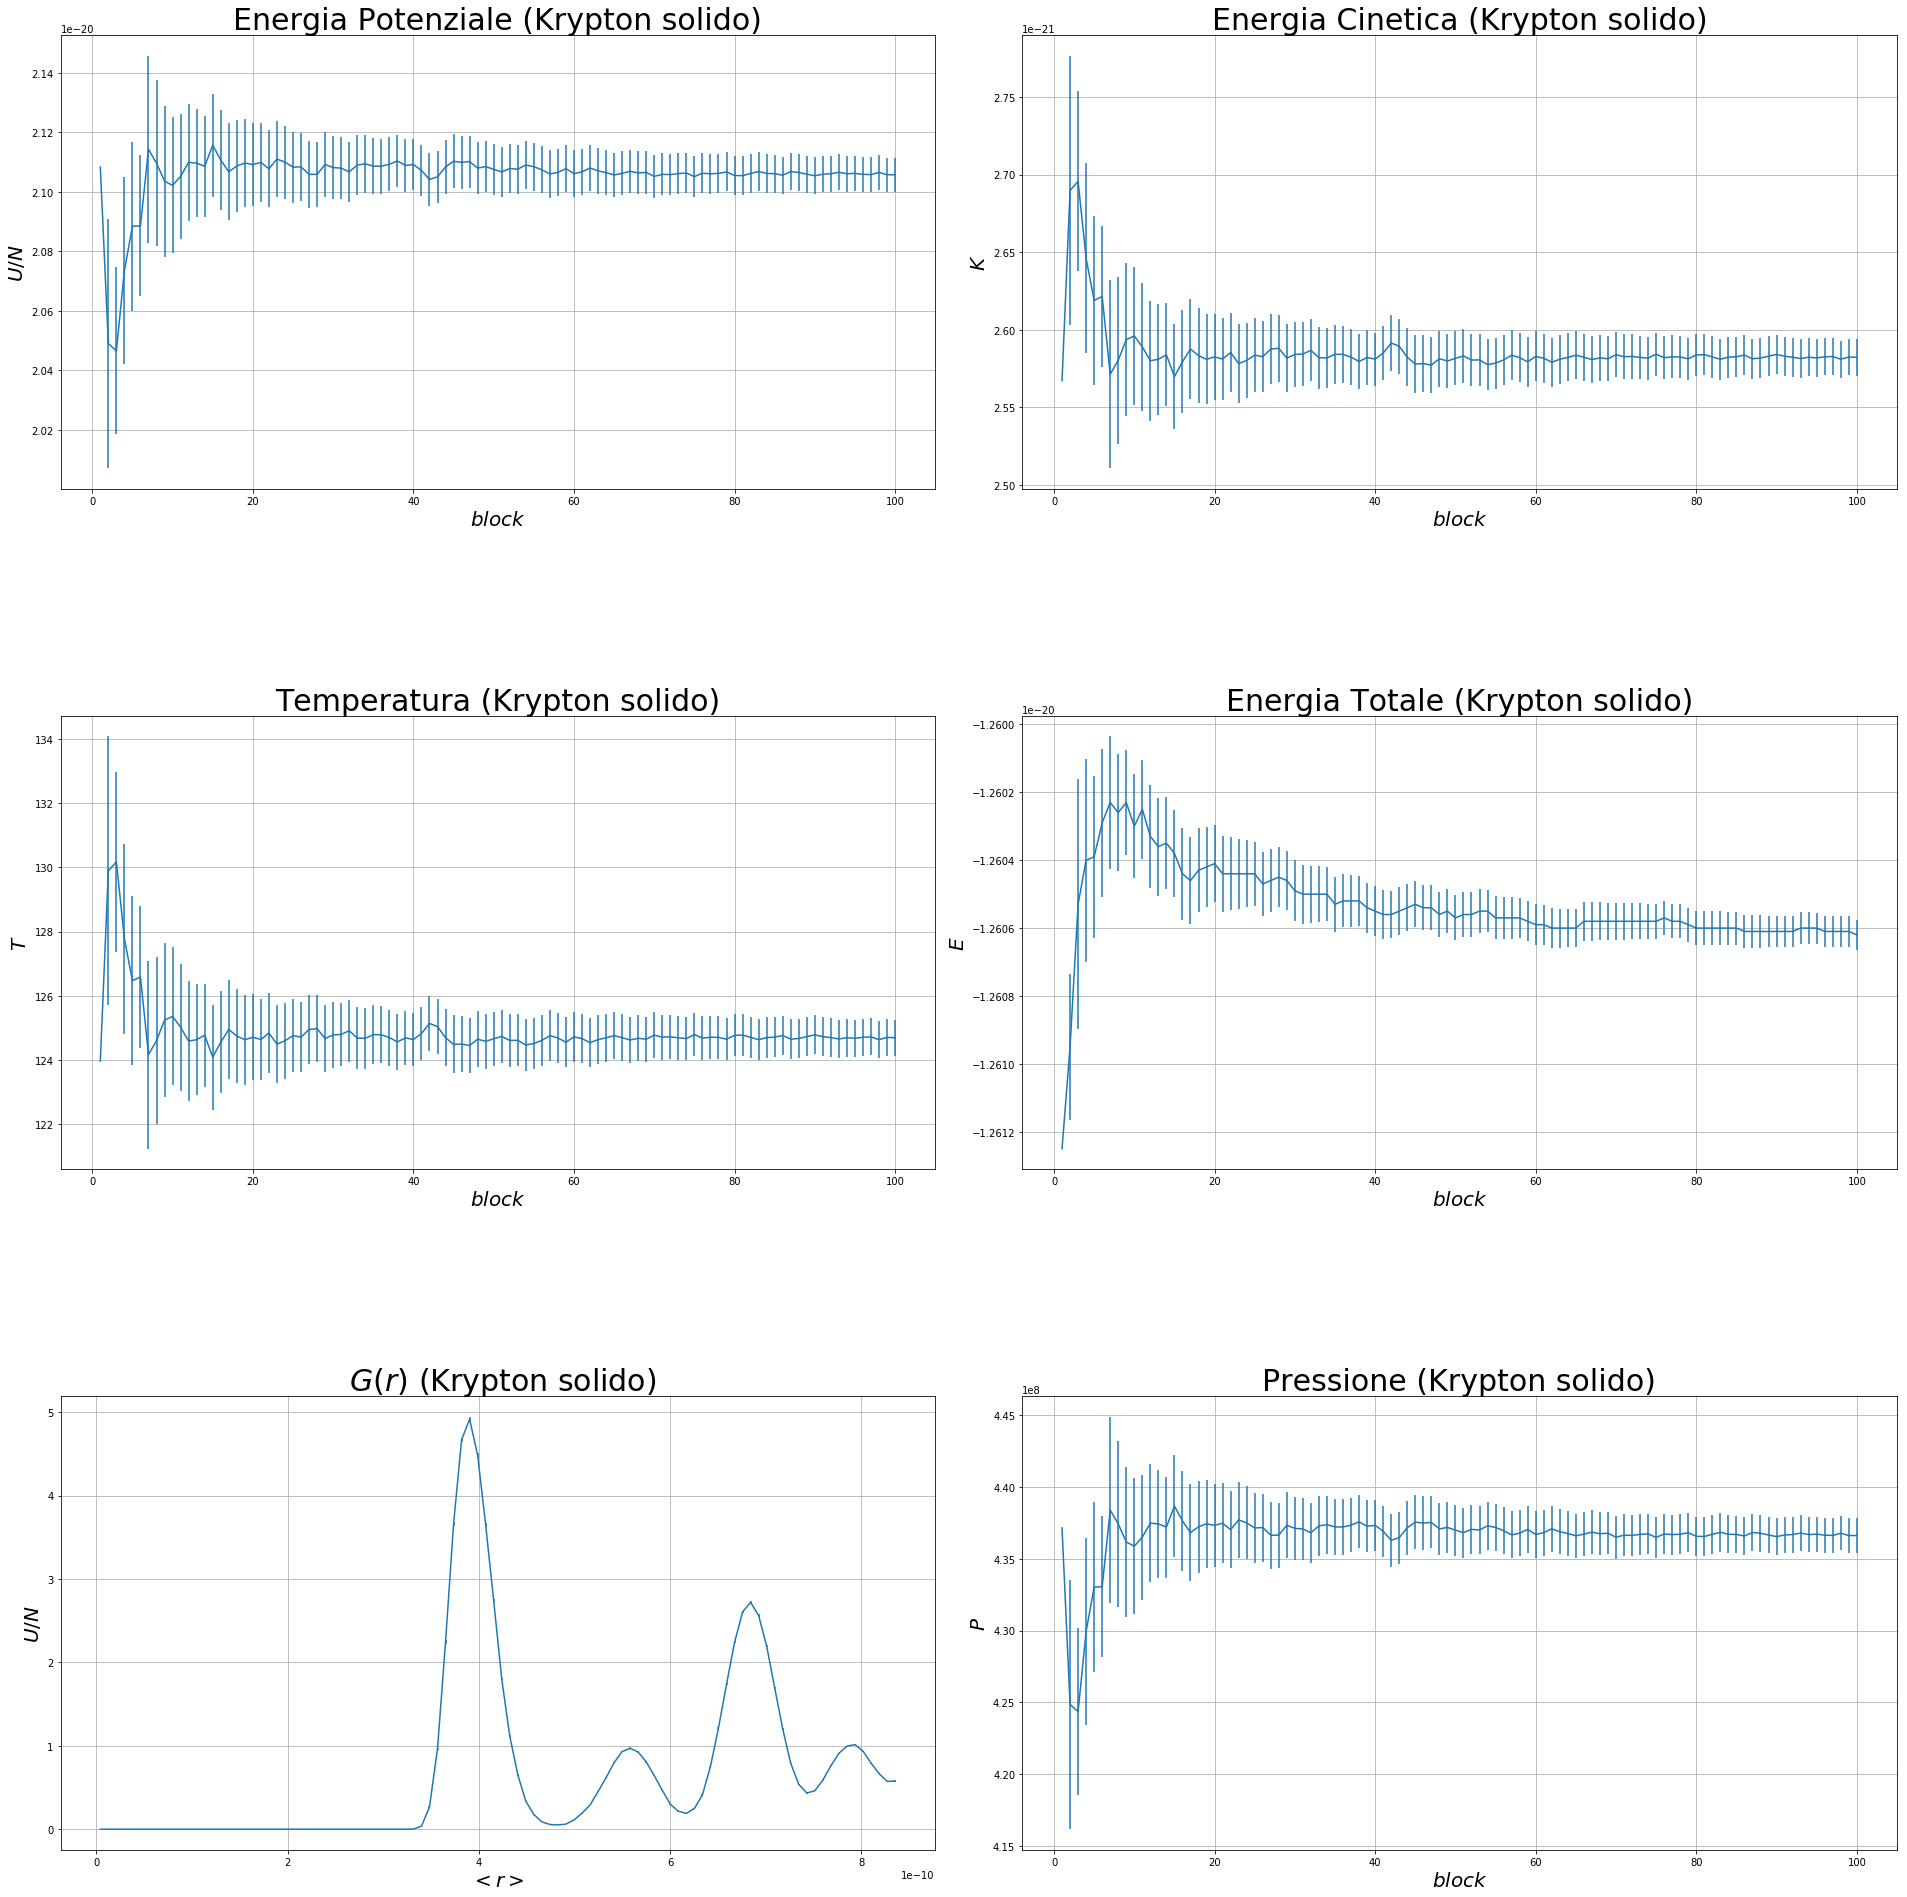

In [3]:
x,a,y,erry = np.loadtxt("Krypton/Krypton_S.epot.dat",unpack=True)
x1,a1,y1,erry1 = np.loadtxt("Krypton/Krypton_S.kin.dat",unpack=True)
x2,a2,y2,erry2 = np.loadtxt("Krypton/Krypton_S.tem.dat",unpack=True)
x3,a3,y3,erry3 = np.loadtxt("Krypton/Krypton_S.etot.dat",unpack=True)
b4,a4,x4,y4,erry4 = np.loadtxt("Krypton/Krypton_S.gofr.dat",unpack=True)
x5,a5,y5,erry5 = np.loadtxt("Krypton/Krypton_S.press.dat",unpack=True)


plt.figure(figsize=(30,30))

plt.subplot(321) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title('Energia Potenziale (Krypton solido)',fontsize=30)


plt.subplot(322) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$K$',fontsize=20)
plt.grid(True)
plt.title('Energia Cinetica (Krypton solido)',fontsize=30)

plt.subplot(323) 
plt.errorbar(x2,y2,yerr=erry2)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$T$',fontsize=20)
plt.grid(True)
plt.title('Temperatura (Krypton solido)',fontsize=30)

plt.subplot(324) 
plt.errorbar(x3,y3,yerr=erry3)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$E$',fontsize=20)
plt.grid(True)
plt.title('Energia Totale (Krypton solido)',fontsize=30)

plt.subplot(325) 
plt.errorbar(x4,y4,yerr=erry4)
plt.xlabel('$<r>$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title(' $G(r)$ (Krypton solido)',fontsize=30)

plt.subplot(326) 
plt.errorbar(x5,y5,yerr=erry5)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$P$',fontsize=20)
plt.grid(True)
plt.title('Pressione (Krypton solido)',fontsize=30)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.1) 

plt.show()

### Argon Gassoso

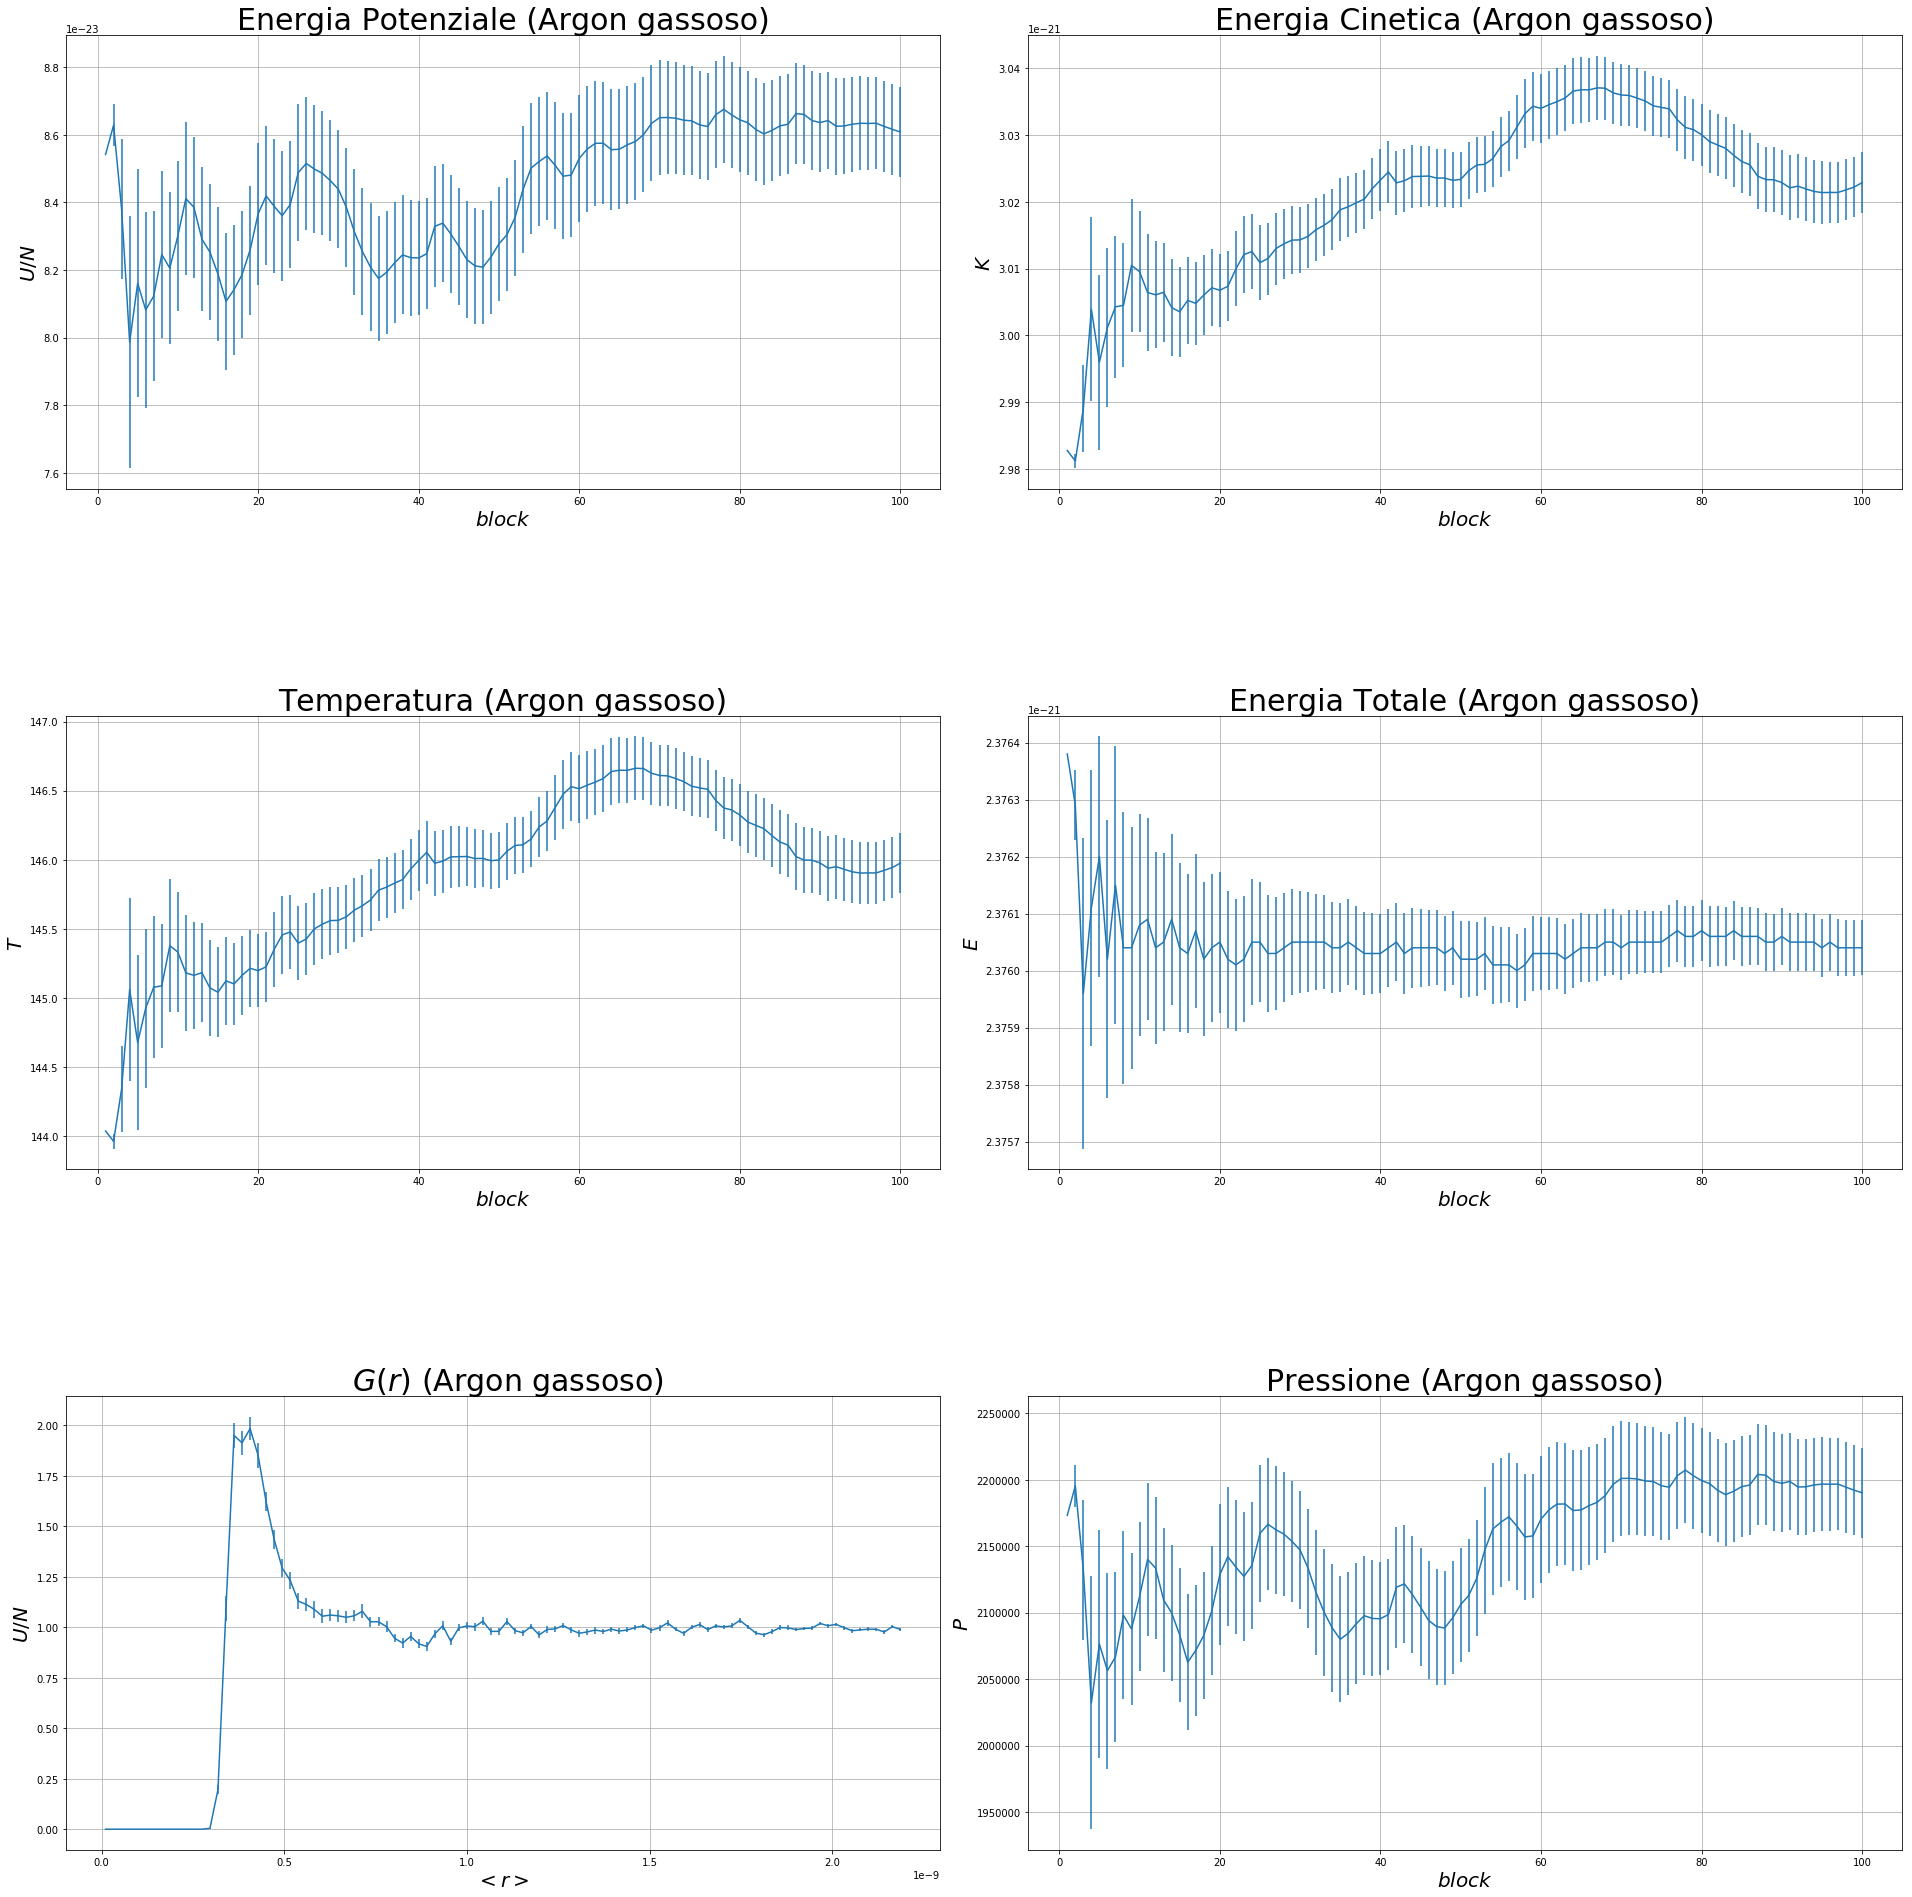

In [8]:
x,a,y,erry = np.loadtxt("Argon/Argon_G.epot.dat",unpack=True)
x1,a1,y1,erry1 = np.loadtxt("Argon/Argon_G.kin.dat",unpack=True)
x2,a2,y2,erry2 = np.loadtxt("Argon/Argon_G.tem.dat",unpack=True)
x3,a3,y3,erry3 = np.loadtxt("Argon/Argon_G.etot.dat",unpack=True)
b4,a4,x4,y4,erry4 = np.loadtxt("Argon/Argon_G.gofr.dat",unpack=True)
x5,a5,y5,erry5 = np.loadtxt("Argon/Argon_G.press.dat",unpack=True)


plt.figure(figsize=(30,30))

plt.subplot(321) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title('Energia Potenziale (Argon gassoso)',fontsize=30)


plt.subplot(322) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$K$',fontsize=20)
plt.grid(True)
plt.title('Energia Cinetica (Argon gassoso)',fontsize=30)

plt.subplot(323) 
plt.errorbar(x2,y2,yerr=erry2)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$T$',fontsize=20)
plt.grid(True)
plt.title('Temperatura (Argon gassoso)',fontsize=30)

plt.subplot(324) 
plt.errorbar(x3,y3,yerr=erry3)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$E$',fontsize=20)
plt.grid(True)
plt.title('Energia Totale (Argon gassoso)',fontsize=30)

plt.subplot(325) 
plt.errorbar(x4,y4,yerr=erry4)
plt.xlabel('$<r>$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title(' $G(r)$ (Argon gassoso)',fontsize=30)

plt.subplot(326) 
plt.errorbar(x5,y5,yerr=erry5)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$P$',fontsize=20)
plt.grid(True)
plt.title('Pressione (Argon gassoso)',fontsize=30)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.1) 

plt.show()

### Krypton Gassoso

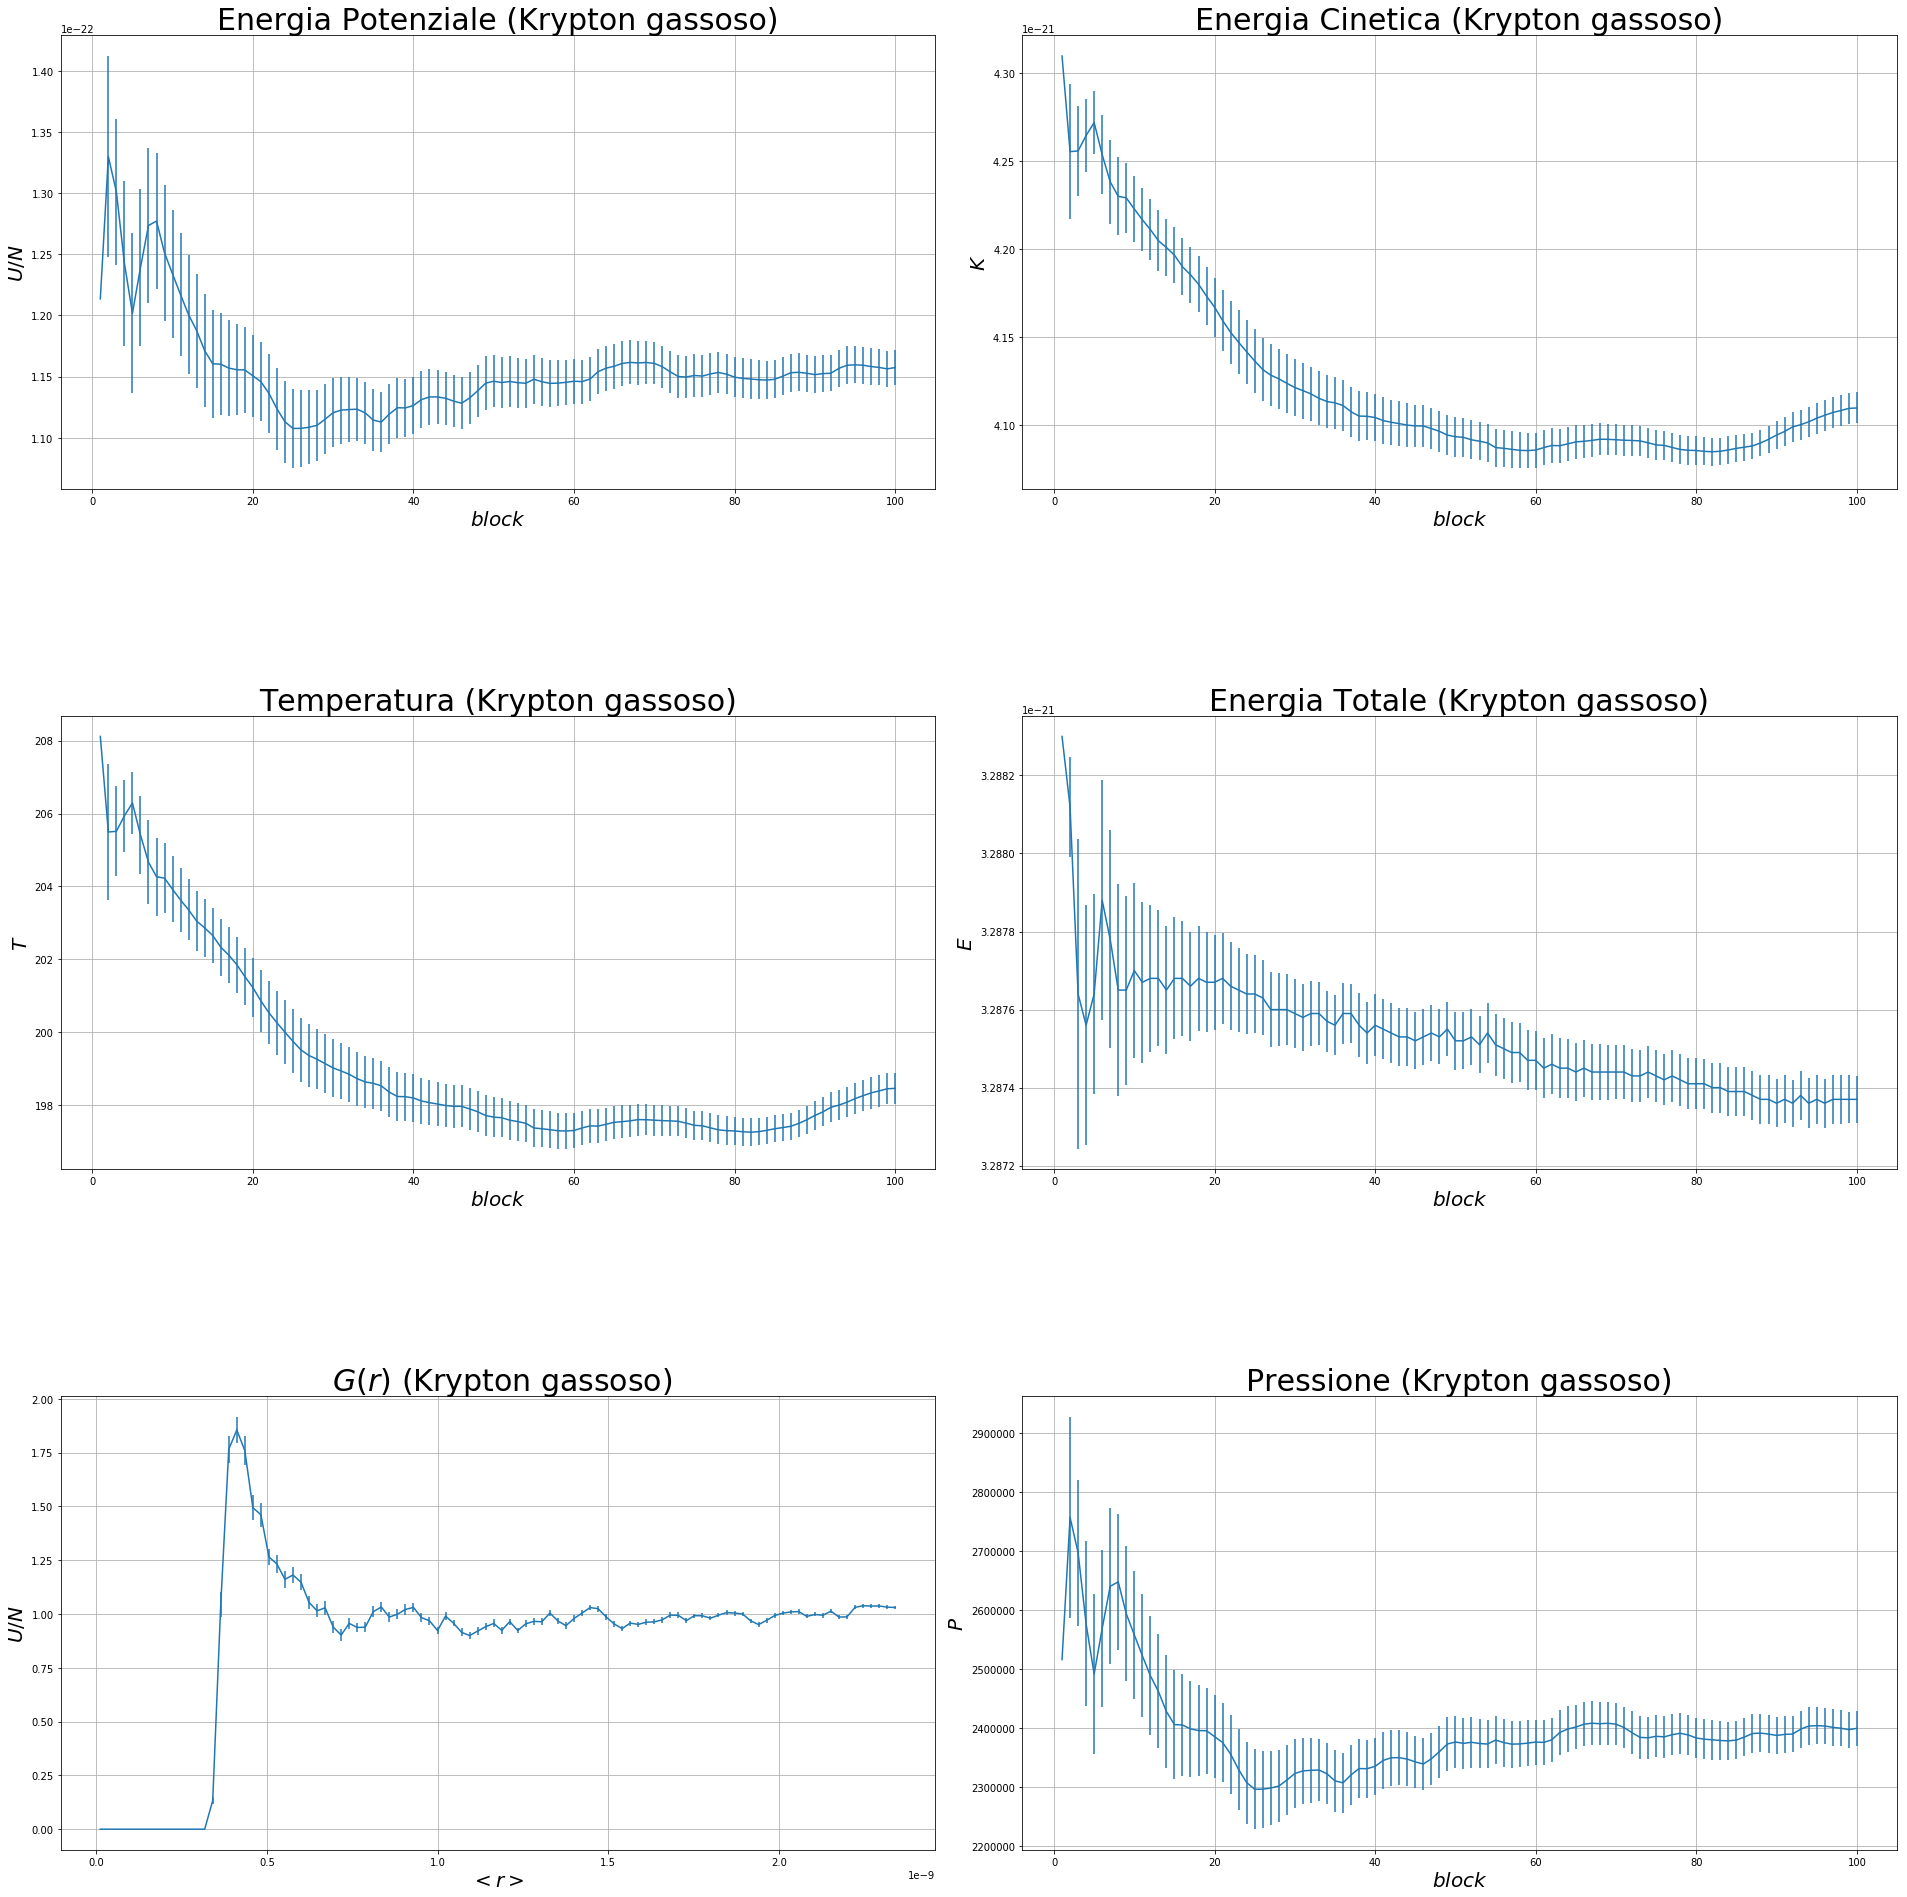

In [3]:
x,a,y,erry = np.loadtxt("Krypton/Krypton_G.epot.dat",unpack=True)
x1,a1,y1,erry1 = np.loadtxt("Krypton/Krypton_G.kin.dat",unpack=True)
x2,a2,y2,erry2 = np.loadtxt("Krypton/Krypton_G.tem.dat",unpack=True)
x3,a3,y3,erry3 = np.loadtxt("Krypton/Krypton_G.etot.dat",unpack=True)
b4,a4,x4,y4,erry4 = np.loadtxt("Krypton/Krypton_G.gofr.dat",unpack=True)
x5,a5,y5,erry5 = np.loadtxt("Krypton/Krypton_G.press.dat",unpack=True)


plt.figure(figsize=(30,30))

plt.subplot(321) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title('Energia Potenziale (Krypton gassoso)',fontsize=30)

plt.subplot(322) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$K$',fontsize=20)
plt.grid(True)
plt.title('Energia Cinetica (Krypton gassoso)',fontsize=30)

plt.subplot(323) 
plt.errorbar(x2,y2,yerr=erry2)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$T$',fontsize=20)
plt.grid(True)
plt.title('Temperatura (Krypton gassoso)',fontsize=30)

plt.subplot(324) 
plt.errorbar(x3,y3,yerr=erry3)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$E$',fontsize=20)
plt.grid(True)
plt.title('Energia Totale (Krypton gassoso)',fontsize=30)

plt.subplot(325) 
plt.errorbar(x4,y4,yerr=erry4)
plt.xlabel('$<r>$',fontsize=20)
plt.ylabel('$U/N$',fontsize=20)
plt.grid(True)
plt.title(' $G(r)$ (Krypton gassoso)',fontsize=30)

plt.subplot(326) 
plt.errorbar(x5,y5,yerr=erry5)
plt.xlabel('$block$',fontsize=20)
plt.ylabel('$P$',fontsize=20)
plt.grid(True)
plt.title('Pressione (Krypton gassoso)',fontsize=30)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.1) 

plt.show()

### Avvertenze:

Tutte le volte in cui nei codici sarà presente un restart bisogna assicurarsi prima di avere una configuarazione da cui partire (nel caso in cui non ci sia crearla eseguendo il codice).